# 커피지수

In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/mnt')

Mounted at /content/mnt


In [3]:
result_dir = '/content/mnt/MyDrive/results/CoffeeIndex'
cf = pd.read_csv(f'{result_dir}/커피지수.csv')
cf.head()

,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,가평,9,2,0,0,0.222222
1,강릉,15,5,0,2,0.294118
2,강진,1,0,0,0,0.000000
3,거제,9,6,0,0,0.666667
4,거창,1,0,0,1,0.000000


In [4]:
data_folder = '/content/mnt/MyDrive/데이터/인구소멸위기지역'
map_raw = pd.read_excel(f'{data_folder}/draw_korea_raw(2021).xlsx')

In [5]:
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace=True)
print(map.shape)
map.head()

(250, 3)


,level_0,level_1,0
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [6]:
map.columns = ['y','x','ID']
map.head()

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


In [7]:
!cp $data_folder/draw_map.py .
!ls -l

total 16
-rw------- 1 root root 5269 Sep  8 03:31 draw_map.py
drwx------ 5 root root 4096 Sep  8 03:30 mnt
drwxr-xr-x 1 root root 4096 Sep  1 19:26 sample_data


In [8]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

In [9]:
df = pd.merge(map, cf, how='left')
print(df.shape)
df.head()

(250, 8)


,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2.0,0.0,0.0,0.0,0.000000
1,0,8,화천,1.0,0.0,0.0,1.0,0.000000
2,0,9,양구,1.0,0.0,0.0,0.0,0.000000
3,0,10,고성(강원),NaN,NaN,NaN,NaN,NaN
4,1,3,양주,17.0,7.0,0.0,1.0,0.388889


In [10]:
df.fillna(0, inplace=True)
df['이디야'] = df.이디야.astype(int)
df['스타벅스'] = df.스타벅스.astype(int)
df['커피빈'] = df.커피빈.astype(int)
df['빽다방'] = df.빽다방.astype(int)
df.head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
0,0,7,철원,2,0,0,0,0.000000
1,0,8,화천,1,0,0,1,0.000000
2,0,9,양구,1,0,0,0,0.000000
3,0,10,고성(강원),0,0,0,0,0.000000
4,1,3,양주,17,7,0,1,0.388889


In [11]:
# 커피지수 Top 10 지역
df.sort_values(by='커피지수', ascending=False).head(10)

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
186,17,12,부산 해운대,8,33,4,2,3.700000
66,7,7,서울 강남,27,79,47,9,3.500000
65,7,6,서울 서초,18,42,26,4,3.090909
196,18,10,부산 동구,2,5,1,0,3.000000
33,4,6,서울 종로,13,31,13,3,2.750000
44,5,6,서울 중구,17,43,8,5,2.318182
203,19,6,함안,1,0,2,0,2.000000
6,1,5,연천,1,0,2,0,2.000000
76,8,7,성남 분당,16,45,7,11,1.925926
151,14,10,대구 수성,9,21,2,3,1.916667


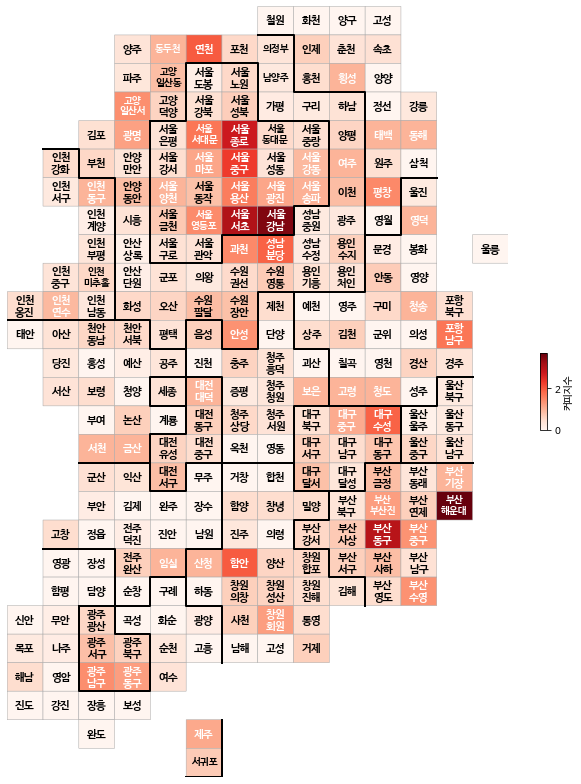

In [12]:
drawKorea('커피지수', df, 'Reds')

In [13]:
# 스타벅스 Top 5 지역
df.sort_values(by='스타벅스', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,27,79,47,9,3.500000
76,8,7,성남 분당,16,45,7,11,1.925926
44,5,6,서울 중구,17,43,8,5,2.318182
65,7,6,서울 서초,18,42,26,4,3.090909
57,6,8,서울 송파,32,33,8,7,1.051282


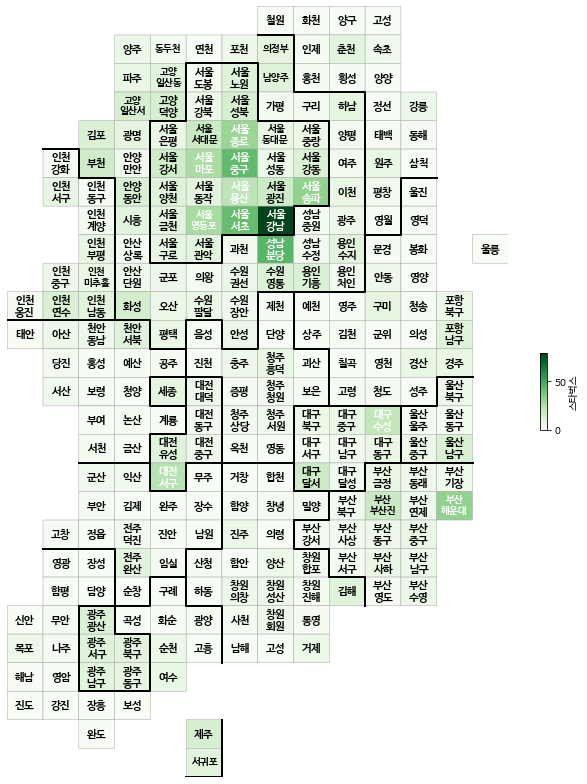

In [14]:
drawKorea('스타벅스', df, 'Greens')

In [15]:
# 커피빈 Top 5 지역
df.sort_values(by='커피빈', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
66,7,7,서울 강남,27,79,47,9,3.500000
65,7,6,서울 서초,18,42,26,4,3.090909
33,4,6,서울 종로,13,31,13,3,2.750000
64,7,5,서울 영등포,21,28,10,5,1.461538
57,6,8,서울 송파,32,33,8,7,1.051282


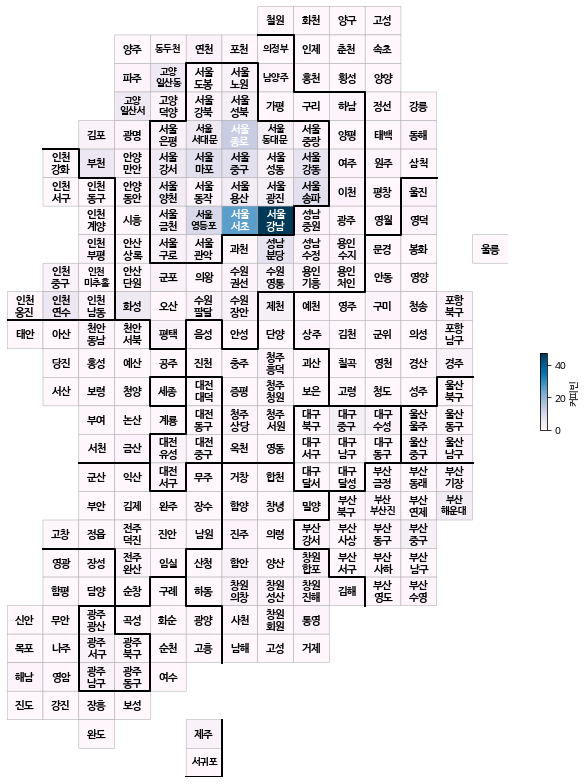

In [16]:
drawKorea('커피빈', df, 'PuBu')

In [17]:
# 이디야 Top 5 지역
df.sort_values(by='이디야', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
16,2,7,남양주,44,12,1,5,0.265306
42,5,4,서울 강서,37,17,5,8,0.488889
57,6,8,서울 송파,32,33,8,7,1.051282
217,20,9,김해,32,12,1,3,0.371429
164,15,12,울산 남구,30,14,1,6,0.416667


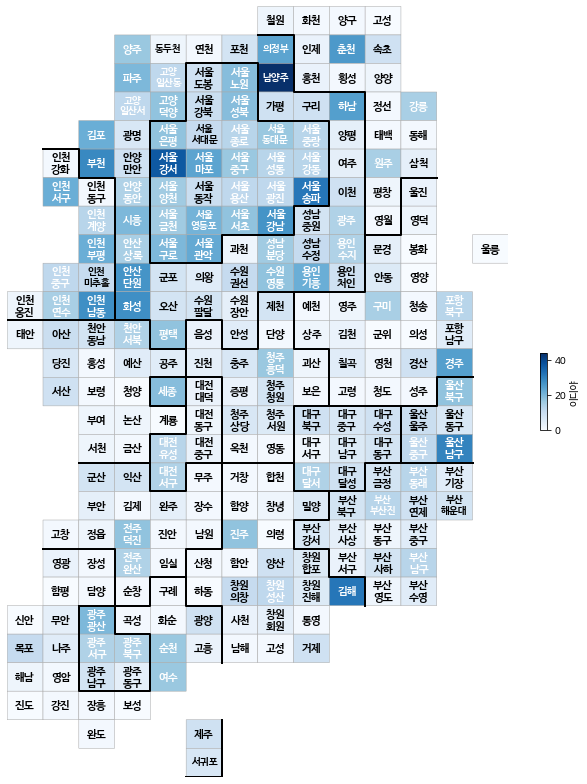

In [18]:
drawKorea('이디야', df, 'Blues')

In [19]:
# 빽다방 Top 5 지역
df.sort_values(by='빽다방', ascending=False).head()

,y,x,ID,이디야,스타벅스,커피빈,빽다방,커피지수
167,16,4,대전 서구,14,24,1,14,0.892857
29,4,2,김포,22,14,2,13,0.457143
50,6,1,인천 서구,22,9,0,11,0.272727
95,10,2,인천 남동,28,11,1,11,0.307692
40,5,2,부천,29,17,6,11,0.575000


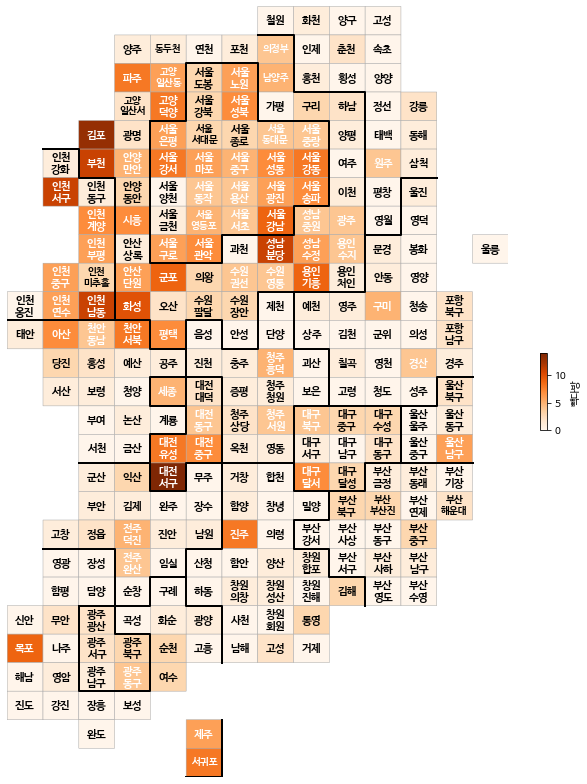

In [20]:
drawKorea('빽다방', df, 'Oranges')